In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (166)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (290)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (430)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (89)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (261)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUS

In [13]:
#!pip install tensorflow
#!pip install keras

import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier



In [14]:
# Configurare prag și filtru CLAHE
threshold_value = 100
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

data_dir = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/"
classes = os.listdir(data_dir)

data = []
labels = []
for c in classes:
    path = os.path.join(data_dir, c)
    class_num = classes.index(c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # Aplică treshold
        _, img_array = cv2.threshold(img_array, threshold_value, 255, cv2.THRESH_BINARY)
        # Aplică filtrul CLAHE
        img_array = clahe.apply(img_array)
        img_array = cv2.resize(img_array, (224, 224))
        data.append(img_array)
        labels.append(class_num)


In [15]:
data = np.array(data)
labels = np.array(labels)


In [16]:
# Impărțirea setului de date în set de antrenare și set de testare
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


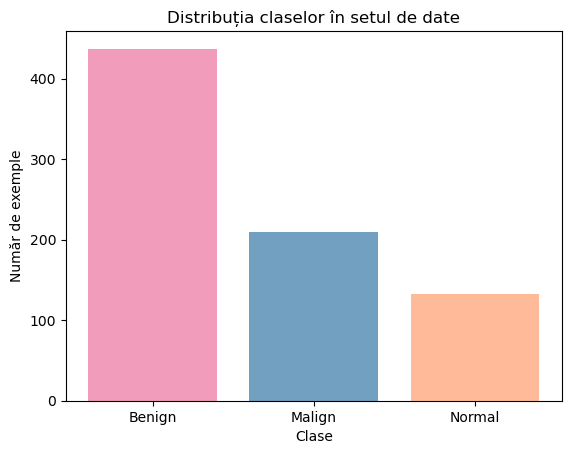

In [17]:
import matplotlib.pyplot as plt

# Numărul de exemple pentru fiecare clasă
num_benign = 437
num_malign = 210
num_normal = 133

# Numele claselor
classes = ['Benign', 'Malign', 'Normal']

# Numărul de exemple pentru fiecare clasă
class_counts = [num_benign, num_malign, num_normal]

# Crearea graficului de bare
plt.bar(classes, class_counts, color=['#F19CBB', '#72A0C1', '#FFBB99'])
plt.xlabel('Clase')
plt.ylabel('Număr de exemple')
plt.title('Distribuția claselor în setul de date')
plt.show()

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


Epoch 1/10
40/40 [==============================] - 39s 959ms/step - loss: 105.1267 - accuracy: 0.4342 - val_loss: 1.4304 - val_accuracy: 0.4873
Epoch 2/10
40/40 [==============================] - 39s 977ms/step - loss: 0.6301 - accuracy: 0.7147 - val_loss: 1.1704 - val_accuracy: 0.5285
Epoch 3/10
40/40 [==============================] - 38s 954ms/step - loss: 0.2979 - accuracy: 0.8653 - val_loss: 1.2872 - val_accuracy: 0.5506
Epoch 4/10
40/40 [==============================] - 38s 961ms/step - loss: 0.1607 - accuracy: 0.9160 - val_loss: 1.4336 - val_accuracy: 0.6266
Epoch 5/10
40/40 [==============================] - 38s 960ms/step - loss: 0.1106 - accuracy: 0.9992 - val_loss: 1.7063 - val_accuracy: 0.6456
Epoch 6/10
40/40 [==============================] - 38s 961ms/step - loss: 0.1061 - accuracy: 0.9984 - val_loss: 1.6706 - val_accuracy: 0.6519
Epoch 7/10
40/40 [==============================] - 38s 961ms/step - loss: 0.0947 - accuracy: 0.9984 - val_loss: 1.7667 - val_accuracy: 0.64

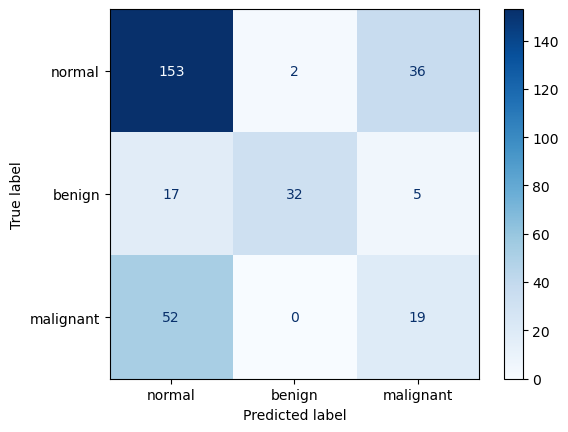

In [18]:
# Construirea modelului CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Antrenarea modelului
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

# Evaluarea modelului pe setul de testare
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# Realizarea de predicții pe setul de testare
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Vizualizarea matricei de confuzie
class_names = ["normal", "benign", "malignant"]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [19]:
from sklearn.neural_network import MLPClassifier

# Aplanați datele imaginilor
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)


In [20]:
# Reshape the image data
import xgboost as xgb
from sklearn.metrics import accuracy_score
train_data_reshaped = train_data.reshape(train_data.shape[0], -1)
test_data_reshaped = test_data.reshape(test_data.shape[0], -1)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(train_data_reshaped, train_labels)

# Make predictions on the reshaped test data
xgb_predictions = xgb_model.predict(test_data_reshaped)

# Calculate accuracy
xgb_accuracy = accuracy_score(test_labels, xgb_predictions)
print(f"XGBoost Model Accuracy: {xgb_accuracy}")


XGBoost Model Accuracy: 0.7246835443037974


XGBoost Model Test Accuracy: 0.7246835443037974


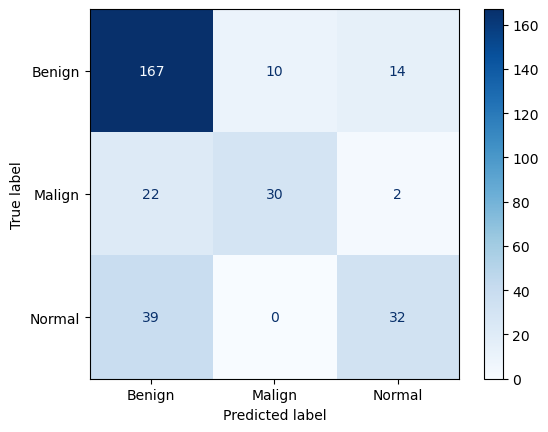

In [21]:
# Evaluarea acurateții modelului XGBoost pe setul de testare
xgb_test_acc = xgb_model.score(test_data_flat, test_labels)
print(f"XGBoost Model Test Accuracy: {xgb_test_acc}")

# Calcularea matricei de confuzie pentru modelul XGBoost
xgb_predicted_labels = xgb_model.predict(test_data_flat)
xgb_conf_matrix = confusion_matrix(test_labels, xgb_predicted_labels)

# Vizualizarea matricei de confuzie pentru modelul XGBoost
class_names = classes  # Numele claselor în ordine
disp = ConfusionMatrixDisplay(xgb_conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()


In [22]:
from sklearn import svm
from sklearn.svm import SVC    
# Crearea modelului SVM
svm_model = SVC(kernel='linear')
svm_model.fit(train_data_flat, train_labels)

# Evaluarea acurateții modelului SVM pe setul de testare
svm_test_acc = svm_model.score(test_data_flat, test_labels)
print(f"SVM Model Test Accuracy: {svm_test_acc}")


SVM Model Test Accuracy: 0.5854430379746836


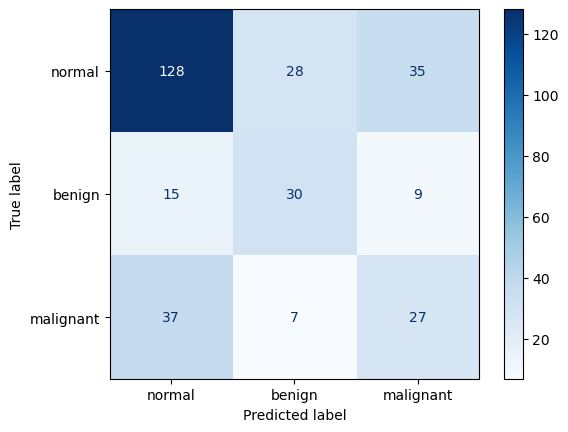

In [23]:
# Calcularea matricei de confuzie pentru modelul SVM
svm_predicted_labels = svm_model.predict(test_data_flat)
svm_conf_matrix = confusion_matrix(test_labels, svm_predicted_labels)

# Vizualizarea matricei de confuzie pentru modelul SVM
class_names = ["normal", "benign", "malignant"]  # Numele claselor în ordine
disp = ConfusionMatrixDisplay(svm_conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Crearea modelului Random Forests
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_data_flat, train_labels)

# Evaluarea acurateții modelului Random Forests pe setul de testare
rf_test_acc = rf_model.score(test_data_flat, test_labels)
print(f"Random Forest Model Test Accuracy: {rf_test_acc}")



Random Forest Model Test Accuracy: 0.7626582278481012


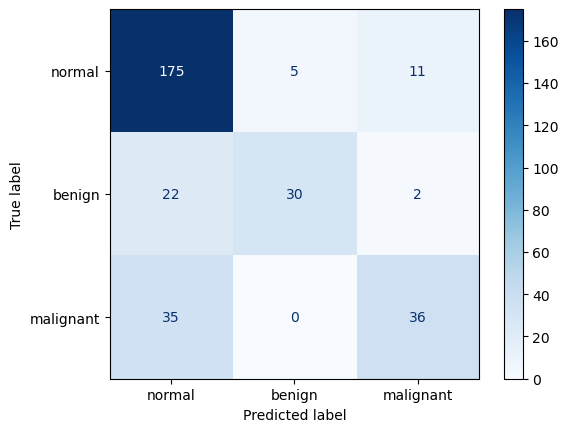

In [25]:

# Calcularea matricei de confuzie pentru modelul Random Forests
rf_predicted_labels = rf_model.predict(test_data_flat)
rf_conf_matrix = confusion_matrix(test_labels, rf_predicted_labels)

# Vizualizarea matricei de confuzie pentru modelul Random Forests
class_names = ["normal", "benign", "malignant"]  # Numele claselor în ordine
disp = ConfusionMatrixDisplay(rf_conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [26]:

from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Flatten, Dense

xception_model = Sequential()
xception_model.add(Xception(weights=None, include_top=False, input_shape=(224, 224, 3)))
xception_model.add(Flatten())
xception_model.add(Dense(128, activation='relu'))
xception_model.add(Dense(3, activation='softmax'))

xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Antrenare model
model.fit(train_data, train_labels)

# Evaluare pe setul de testare
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 2s 235ms/step - loss: 1.6719 - accuracy: 0.6424
Test Accuracy: 0.642405092716217


In [27]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense

resnet_model = Sequential()
resnet_model.add(ResNet50(weights=None,include_top=False, input_shape=(224, 224, 3)))
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels)

# Evaluare pe setul de testare
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 2s 246ms/step - loss: 1.7280 - accuracy: 0.6361
Test Accuracy: 0.6360759735107422


In [31]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense

vgg16_model = Sequential()
vgg16_model.add(VGG16(weights=None,include_top=False, input_shape=(224, 224, 3)))
vgg16_model.add(Flatten())
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(3, activation='softmax'))

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels)
# Evaluare pe setul de testare
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 4s 370ms/step - loss: 3.4962 - accuracy: 0.6835
Test Accuracy: 0.6835442781448364


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Crearea modelului Decision Tree
decision_tree_model = DecisionTreeClassifier()

# Antrenarea modelului Decision Tree
decision_tree_model.fit(train_data_flat, train_labels)

# Evaluarea acurateții modelului Decision Tree pe setul de testare
decision_tree_test_acc = decision_tree_model.score(test_data_flat, test_labels)
print(f"Decision Tree Model Test Accuracy: {decision_tree_test_acc}")


Decision Tree Model Test Accuracy: 0.6708860759493671


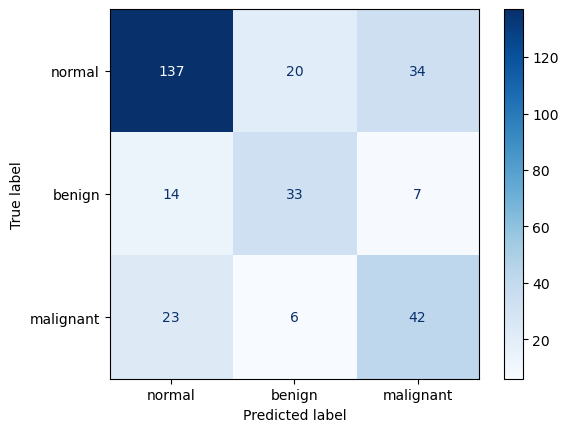

In [29]:
# Calcularea matricei de confuzie pentru modelul Decision Tree
decision_tree_predicted_labels = decision_tree_model.predict(test_data_flat)
decision_tree_conf_matrix = confusion_matrix(test_labels, decision_tree_predicted_labels)

# Vizualizarea matricei de confuzie pentru modelul Decision Tree
class_names = ["normal", "benign", "malignant"]  # Numele claselor în ordine
disp = ConfusionMatrixDisplay(decision_tree_conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()
